# Optimizing Investment Portfolios Using the Efficient Frontier
This notebook demonstrates how to compute and visualize the Efficient Frontier for a two-asset portfolio.
The Efficient Frontier is a key concept in Modern Portfolio Theory (MPT), used to optimize risk-adjusted returns.
We will use Python libraries like NumPy, Pandas, and Matplotlib to perform the analysis.


In [2]:
import pandas as pd 
ind=pd.read_csv("C:/Users/Nikita Sharma/Downloads/data/ind30_m_vw_rets.csv", header=0 , index_col=0 , parse_dates=True)/100

C:\Users\Nikita Sharma\AppData\Local\Temp\ipykernel_17520\1284832778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind=pd.read_csv("C:/Users/Nikita Sharma/Downloads/data/ind30_m_vw_rets.csv", header=0 , index_col=0 , parse_dates=True)/100


In [3]:
ind.index

Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702, 192703,
       192704,
       ...
       201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811,
       201812],
      dtype='int64', length=1110)

In [4]:
ind.index = pd.to_datetime(ind.index , format="%Y%m").to_period('M')

In [5]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [6]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [7]:
##removing the blank spaces in alll the column names
ind.columns= ind.columns.str.strip()

In [8]:
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [9]:
ind.shape

(1110, 30)

In [71]:
import pandas as pd
import numpy as np
import scipy.stats
def path_to_data_folder():
    return "C:/Users/Nikita Sharma/Downloads/data/" 

def get_ffme_returns():
    '''
    Returns the French-Fama dataset for the returns of the bottom and top 
    deciles (Low 10 (Small Caps) and Hi 10 (Large Caps)) of US stocks
    '''
    filepath = path_to_data_folder() + "Portfolios_Formed_on_ME_monthly_EW.csv"
    rets = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99)
    rets = rets[["Lo 20", "Hi 20"]] / 100
    rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period("M") #.to_period("M") forces the index to be monthly period..
    return rets 
   
def get_hfi_returns():
    '''
    Returns the EDHEC Hedge Funds Index returns
    '''
    filepath = path_to_data_folder() + "edhec-hedgefundindices.csv"
    hfi = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99) / 100.0
    # the index is already of type datetime
    return hfi 

def get_ind_returns ():
    """"
    Load and format the Ken French 30 Industry Portfolios value weighted Monthly Returns"""
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

def get_brka_rets(monthly=False):
    '''
    Load and format Berkshire Hathaway's returns from 1990-01 to 2018-12.
    Default data are daily returns. 
    If monthly=True, then monthly data are returned. Here, the method used 
    the .resample method which allows to run an aggregation function on each  
    group of returns of the daily time series.
    '''
    filepath = path_to_data_folder() + "brka_d_ret.csv"
    rets = pd.read_csv(filepath, index_col=0, parse_dates=True)
    if monthly:
        rets = rets.resample("M").apply( compound ).to_period("M")
    return rets

def get_fff_returns():
    '''
    Load the Fama-French Research Factors Monthly Dataset.
    Factors returned are those of the Fama-French model:
    - Excess return of the market, i.e., Market minus Risk-Free Rate,
    - Small (size) Minus Big (size) SMB,
    - High (B/P ratio) Minus Low (B/P ratio) HML, 
    - and the Risk Free Rate 
    '''
    filepath = path_to_data_folder() + "F-F_Research_Data_Factors_m.csv"
    fff = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99) / 100
    fff.index = pd.to_datetime(fff.index, format="%Y%m").to_period("M")
    return fff 

def get_ind_(filetype="rets", nind=30, ew=False):
    '''
    Load and format the Kenneth French Industry Portfolios files.
    - filetype: can be "rets", "nfirms", "size"
    - nind: can be 30 or 49
    - ew: if True, equally weighted portfolio dataset are loaded.
      Also, it has a role only when filetype="rets".
    '''
    if nind!=30 and nind!=49:
        raise ValueError("Expected either 30 or 49 number of industries")
    if filetype == "rets":
        portfolio_w = "ew" if ew==True else "vw" 
        name = "{}_rets" .format( portfolio_w )
        divisor = 100.0
    elif filetype == "nfirms":
        name = "nfirms"
        divisor = 1
    elif filetype == "size":
        name = "size"
        divisor = 1
    else:
        raise ValueError("filetype must be one of: rets, nfirms, size")
    filepath = path_to_data_folder() + "ind{}_m_{}.csv" .format(nind, name)
    ind = pd.read_csv(filepath, index_col=0, parse_dates=True) / divisor
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
    ind.columns = ind.columns.str.strip()
    return ind

def get_ind_size():
    """
    """
    path_to_data_folder="C:/Users/Nikita Sharma/Downloads/data/"
    filepath = path_to_data_folder + "ind30_m_size.csv"
    ind=pd.read_csv(filepath, index_col=0, parse_dates=True) 
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
    ind.columns = ind.columns.str.strip()
    return ind
    
def get_ind_nfirms():
    """
    """
    path_to_data_folder="C:/Users/Nikita Sharma/Downloads/data/"
    filepath = path_to_data_folder + "ind30_m_nfirms.csv"
    ind=pd.read_csv(filepath, index_col=0, parse_dates=True) 
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period("M")
    ind.columns = ind.columns.str.strip()
    return ind

def semideviation(r):
    """
    Returns the semidevation aka negative semi deviation of r 
    r must be a series or a dataframe 
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

def get_ind_market_caps(nind=30, weights=False):
    '''
    Load the industry portfolio dataset and returns single industries market caps.
    If weights=True, it returns single industries market cap-weights as a percentage of
    of the total market cap.
    '''
    ind_nfirms = get_ind_file(filetype="nfirms", nind=nind)
    ind_size   = get_ind_file(filetype="size", nind=nind)
    # compute the market capitalization of each industry sector
    ind_caps   = ind_nfirms * ind_size
    if weights:
        # compute the total market capitalization
        total_cap = ind_caps.sum(axis=1)
        # compute single market capitalizations as a percentage of the total market cap
        ind_cap_weight = ind_caps.divide(total_cap, axis=0)
        return ind_cap_weight
    else:
        return ind_caps

def get_total_market_index_returns(nind=30):
    '''
    Computes the returns of a cap-weighted total market index from Kenneth French Industry portfolios
    '''  
    # load the right returns 
    ind_rets = get_ind_file(filetype="rets", nind=nind) 
    # load the cap-weights of each industry 
    ind_cap_weight = get_ind_market_caps(nind=nind, weights=True)
    # total market returns         
    total_market_return = (ind_cap_weight * ind_rets).sum(axis=1)
    return total_market_return

def get_total_market_index(nind=30, capital=1000):
    '''
    Return the cap-weighted total market index from Kenneth French Industry portfolios
    ''' 
    total_market_return = get_total_market_index_returns(nind=nind)
    total_market_index  = capital * (1 + total_market_return).cumprod()
    return total_market_index

In [15]:
ind = get_ind_returns()
ind.shape 

(1110, 30)

In [16]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [21]:
def compound_returns(s, start=100):
    '''
    Compound a pd.Dataframe or pd.Series of returns from an initial default value equal to 100.
    In the former case, the method compounds the returns for every column (Series) by using pd.aggregate. 
    The method returns a pd.Dataframe or pd.Series - using cumprod(). 
    See also the COMPOUND method.
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( compound_returns, start=start )
    elif isinstance(s, pd.Series):
        return start * (1 + s).cumprod()
    else:
        raise TypeError("Expected pd.DataFrame or pd.Series")
       
def drawdown(rets: pd.Series, start=1000):
    '''
    Compute the drawdowns of an input pd.Series of returns. 
    The method returns a dataframe containing: 
    1. the associated wealth index (for an hypothetical starting investment of $1000) 
    2. all previous peaks 
    3. the drawdowns
    '''
    wealth_index   = compound_returns(rets, start=start)
    previous_peaks = wealth_index.cummax()
    drawdowns      = (wealth_index - previous_peaks ) / previous_peaks
    df = pd.DataFrame({"Wealth": wealth_index, "Peaks": previous_peaks, "Drawdown": drawdowns} )
    return df

In [24]:
drawdown(ind["Food"])["Drawdown"]

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.030600
1926-11    0.000000
             ...   
2018-08   -0.041888
2018-09   -0.044954
2018-10   -0.035212
2018-11   -0.008970
2018-12   -0.105397
Freq: M, Name: Drawdown, Length: 1110, dtype: float64

<Axes: >

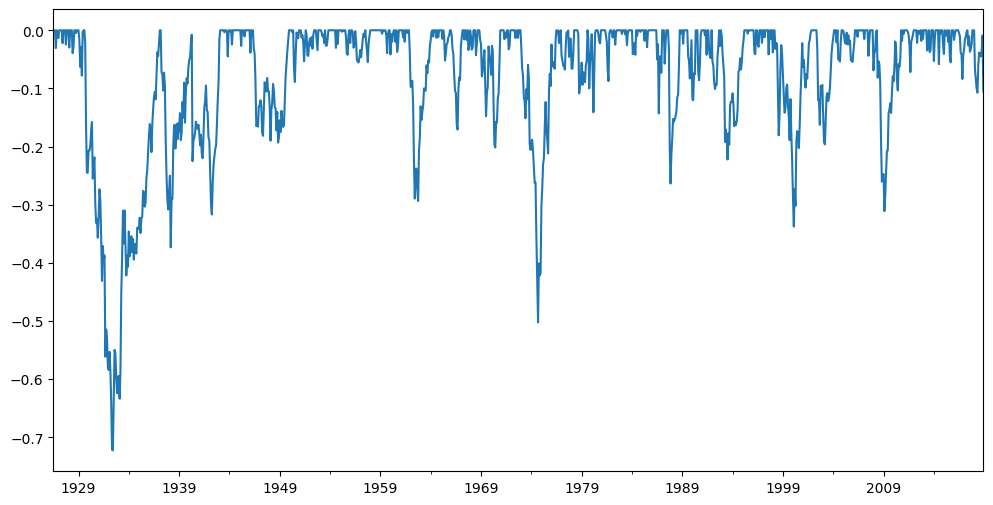

In [25]:
drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [29]:
def skewness(r):
    """
    Alternative to scipy.stats.skew() 
    Computes the skewness of the supplied Series or DataFram 
    Returns a float or Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation , so set dof = 0 
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

def skewness(s):
    '''
    Computes the Skewness of the input Series or Dataframe.
    There is also the function scipy.stats.skew().
    '''
    return ( ((s - s.mean()) / s.std(ddof=0))**3 ).mean()

def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis() 
    Computes the kurtosis of the supplied Series or DataFram 
    Returns a float or Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation , so set dof = 0 
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

def kurtosis(s):
    '''
    Computes the Kurtosis of the input Series or Dataframe.
    There is also the function scipy.stats.kurtosis() which, however, 
    computes the "Excess Kurtosis", i.e., Kurtosis minus 3
    '''
    return ( ((s - s.mean()) / s.std(ddof=0))**4 ).mean()

def var_gaussian(s, level=0.05, cf=False):
    '''
    Returns the (1-level)% VaR using the parametric Gaussian method. 
    By default it computes the 95% VaR, i.e., alpha=0.95 which gives level 1-alpha=0.05.
    The variable "cf" stands for Cornish-Fisher. If True, the method computes the 
    modified VaR using the Cornish-Fisher expansion of quantiles.
    The method takes in input either a DataFrame or a Series and, in the former 
    case, it computes the VaR for every column (Series).
    '''
    # alpha-quantile of Gaussian distribution 
    za = scipy.stats.norm.ppf(level,0,1) 
    if cf:
        S = skewness(s)
        K = kurtosis(s)
        za = za + (za**2 - 1)*S/6 + (za**3 - 3*za)*(K-3)/24 - (2*za**3 - 5*za)*(S**2)/36    
    return -( s.mean() + za * s.std(ddof=0) )


In [31]:
var_gaussian(ind[["Food", "Smoke"]])

Food     0.068226
Smoke    0.084150
dtype: float64

In [33]:
var_gaussian(ind).sort_values().tail()

Autos    0.119941
Servs    0.124616
Steel    0.129697
Games    0.135309
Coal     0.167033
dtype: float64

In [34]:
var_gaussian(ind).sort_values().head()


Telcm    0.067026
Food     0.068226
Hlth     0.080671
Util     0.081711
Smoke    0.084150
dtype: float64

<Axes: >

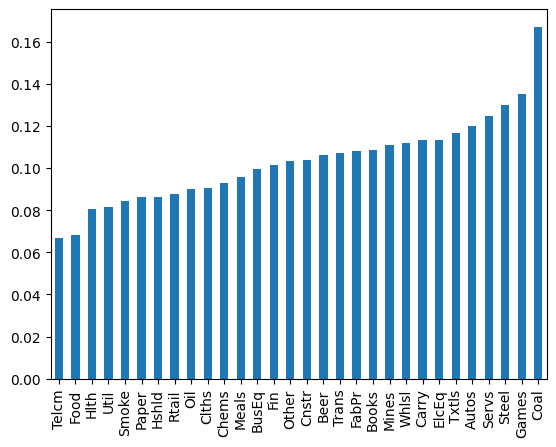

In [35]:
var_gaussian(ind).sort_values().plot.bar()

In [36]:
def annualize_rets(s, periods_per_year):
    '''
    Computes the return per year, or, annualized return.
    The variable periods_per_year can be, e.g., 12, 52, 252, in 
    case of monthly, weekly, and daily data.
    The method takes in input either a DataFrame or a Series and, in the former 
    case, it computes the annualized return for every column (Series) by using pd.aggregate
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( annualize_rets, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        growth = (1 + s).prod()
        n_period_growth = s.shape[0]
        return growth**(periods_per_year/n_period_growth) - 1

def annualize_vol(s, periods_per_year, ddof=1):
    '''
    Computes the volatility per year, or, annualized volatility.
    The variable periods_per_year can be, e.g., 12, 52, 252, in 
    case of monthly, weekly, and daily data.
    The method takes in input either a DataFrame, a Series, a list or a single number. 
    In the former case, it computes the annualized volatility of every column 
    (Series) by using pd.aggregate. In the latter case, s is a volatility 
    computed beforehand, hence only annulization is done
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate(annualize_vol, periods_per_year=periods_per_year )
    elif isinstance(s, pd.Series):
        return s.std(ddof=ddof) * (periods_per_year)**(0.5)
    elif isinstance(s, list):
        return np.std(s, ddof=ddof) * (periods_per_year)**(0.5)
    elif isinstance(s, (int,float)):
        return s * (periods_per_year)**(0.5)

def sharpe_ratio(s, risk_free_rate, periods_per_year, v=None):
    '''
    Computes the annualized sharpe ratio. 
    The variable periods_per_year can be, e.g., 12, 52, 252, in case of yearly, weekly, and daily data.
    The variable risk_free_rate is the annual one.
    The method takes in input either a DataFrame, a Series or a single number. 
    In the former case, it computes the annualized sharpe ratio of every column (Series) by using pd.aggregate. 
    In the latter case, s is the (allready annualized) return and v is the (already annualized) volatility 
    computed beforehand, for example, in case of a portfolio.
    '''
    if isinstance(s, pd.DataFrame):
        return s.aggregate( sharpe_ratio, risk_free_rate=risk_free_rate, periods_per_year=periods_per_year, v=None)
    elif isinstance(s, pd.Series):
        # convert the annual risk free rate to the period assuming that:
        # RFR_year = (1+RFR_period)^{periods_per_year} - 1. Hence:
        rf_to_period = (1 + risk_free_rate)**(1/periods_per_year) - 1        
        excess_return = s - rf_to_period
        # now, annualize the excess return
        ann_ex_rets = annualize_rets(excess_return, periods_per_year)
        # compute annualized volatility
        ann_vol = annualize_vol(s, periods_per_year)
        return ann_ex_rets / ann_vol
    elif isinstance(s, (int,float)) and v is not None:
        # Portfolio case: s is supposed to be the single (already annnualized) 
        # return of the portfolio and v to be the single (already annualized) volatility. 
        return (s - risk_free_rate) / v


<Axes: title={'center': 'Indsutry Sharpe ratios 2000-2018'}>

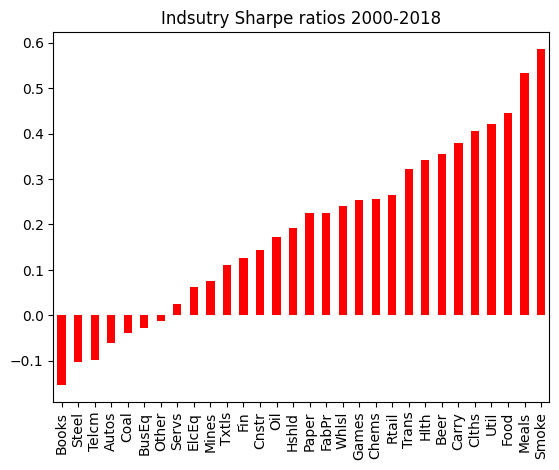

In [40]:
sharpe_ratio(ind["2000":], 0.03, 12).sort_values().plot.bar(title="Indsutry Sharpe ratios 2000-2018",color="red")

In [42]:
annual= annualize_rets(ind["1995":"2000"], 12)

<Axes: >

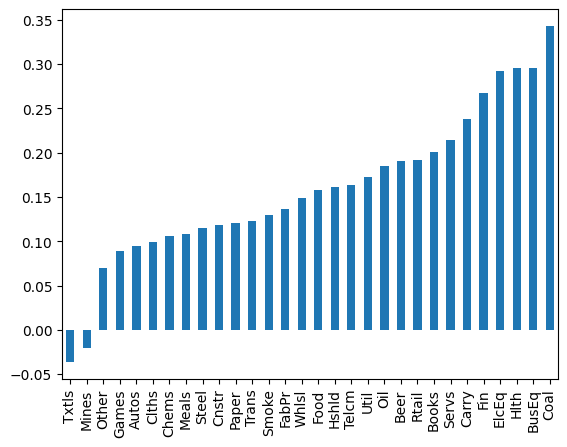

In [43]:
annual.sort_values().plot.bar()

In [44]:
cov = ind["1995":"2000"].cov()

In [45]:
cov.shape

(30, 30)

In [46]:
cov

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
Food,0.002287,0.002077,0.001757,0.000701,0.000886,0.001208,0.001474,0.001105,0.001253,0.001021,...,0.000610,0.000211,-0.000280,0.001205,0.001312,0.000633,0.001165,0.001085,0.001839,0.000898
Beer,0.002077,0.004599,0.001143,0.001147,0.000765,0.002447,0.001415,0.001689,0.001292,0.001721,...,0.000978,0.000400,0.000028,0.001455,0.001974,0.000609,0.001442,0.001634,0.002236,0.001196
Smoke,0.001757,0.001143,0.007130,0.000296,-0.000099,0.000981,0.000761,0.000877,0.000687,0.000555,...,0.000057,-0.000266,-0.000300,0.001061,0.000241,0.001363,0.000069,0.000590,0.001117,0.001418
Games,0.000701,0.001147,0.000296,0.003271,0.001485,0.001018,0.001814,0.001219,0.001547,0.001291,...,0.001615,0.002399,0.002935,0.001615,0.001438,0.001681,0.001649,0.001383,0.002080,0.002088
Books,0.000886,0.000765,-0.000099,0.001485,0.002302,0.000876,0.002037,0.000657,0.001559,0.001362,...,0.001627,0.001996,0.001624,0.001481,0.001576,0.001205,0.001995,0.001026,0.001979,0.001283
Hshld,0.001208,0.002447,0.000981,0.001018,0.000876,0.002849,0.001046,0.001253,0.001226,0.001172,...,0.000889,0.001111,0.000906,0.001594,0.001366,0.000578,0.001157,0.001076,0.001652,0.001322
Clths,0.001474,0.001415,0.000761,0.001814,0.002037,0.001046,0.004896,0.000759,0.002547,0.002105,...,0.001263,0.001401,0.000746,0.002683,0.002466,0.001654,0.002607,0.002229,0.002699,0.001974
Hlth,0.001105,0.001689,0.000877,0.001219,0.000657,0.001253,0.000759,0.002252,0.000444,0.000538,...,0.001093,0.001390,0.001264,0.000552,0.000880,0.000907,0.000770,0.000900,0.001412,0.001099
Chems,0.001253,0.001292,0.000687,0.001547,0.001559,0.001226,0.002547,0.000444,0.002944,0.001705,...,0.000860,0.001072,0.000935,0.002581,0.001966,0.001257,0.001661,0.001425,0.002143,0.001832
Txtls,0.001021,0.001721,0.000555,0.001291,0.001362,0.001172,0.002105,0.000538,0.001705,0.002882,...,0.000790,0.000582,0.000685,0.001869,0.001760,0.001426,0.001696,0.001126,0.001789,0.001668


In [47]:
def portfolio_return(weights, vec_returns):
    '''
    Computes the return of a portfolio. 
    It takes in input a row vector of weights (list of np.array) 
    and a column vector (or pd.Series) of returns
    '''
    return np.dot(weights, vec_returns)
    
def portfolio_volatility(weights, cov_rets):
    '''
    Computes the volatility of a portfolio. 
    It takes in input a vector of weights (np.array or pd.Series) 
    and the covariance matrix of the portfolio asset returns
    '''
    return ( np.dot(weights.T, np.dot(cov_rets, weights)) )**(0.5) 


In [49]:
l = ["Food", "Beer", "Smoke", "Coal"]
annual[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [50]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002287,0.002077,0.001757,0.000034
Beer,0.002077,0.004599,0.001143,0.001261
Smoke,0.001757,0.001143,0.007130,-0.000544
Coal,0.000034,0.001261,-0.000544,0.016153


In [52]:
weights= np.repeat(1/4, 4)
portfolio_return(weights, annual[l])

np.float64(0.20496820684146116)

In [53]:
portfolio_volatility(weights, cov.loc[l,l])

np.float64(0.05100412722141178)

## 2 Asset Frontier 

In [54]:
l = ["Food", "Beer"]


In [ ]:
n_points = 20 
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]


In [57]:
len(weights)

20

In [56]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

<Axes: xlabel='vol', ylabel='R'>

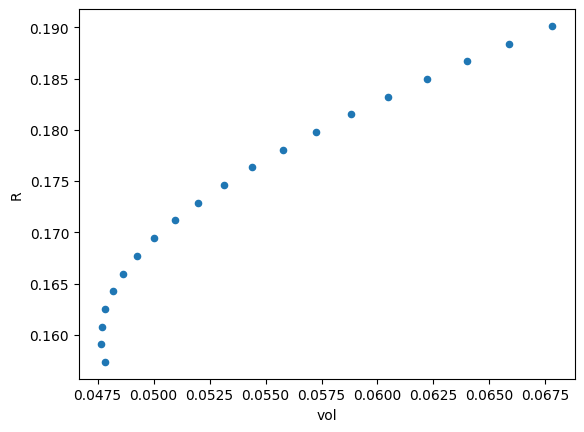

In [61]:
import pandas as pd 

# Remove the extra comma in the first list comprehension
rets = [portfolio_return(w, annual[l]) for w in weights]  # Corrected line
vols = [portfolio_volatility(w, cov.loc[l,l]) for w in weights]

# Create the DataFrame and plot the scatter
ef = pd.DataFrame({"R": rets, "vol": vols})
ef.plot.scatter(x="vol", y="R")



In [69]:
def plot_ef2(n_points, er, cov):
    """
    Plots the 2-asset efficient frontier
    """
    if er.shape[0] != 2 or er.shape[0] != 2:
        raise ValueError("plot_ef2 can only plot 2-asset frontiers")
    
    weights = [np.array([w, 1 - w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_volatility(w, cov) for w in weights]
    
    ef = pd.DataFrame({
        "Returns": rets,
        "Volatility": vols
    })
    
    return ef.plot.line(x="Volatility", y="Returns", style=".-")


<Axes: xlabel='Volatility'>

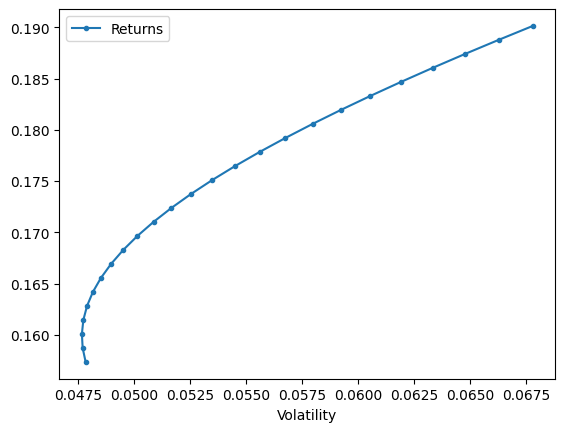

In [70]:
plot_ef2(25, annual[l], cov.loc[l,l])